<a href="https://colab.research.google.com/github/mikeffendii/Google-Stock-Prediction/blob/main/Goole%20Stock%20Prediction%20using%20FaceBook%20Prophet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Google (GOOG) Stock Price prediction using Facebook Prophet 

In [33]:
## Switch to GPU mode for faster Computation (Runtime> Change runtime> GPU)

## Importing all the necessary Libraries

In [34]:
#Necessary libraries = Pandas, fbprophet and plotly

#pandas= data Manipulation and analysis
#fbprophet = Forecasting
#plotly= data visualization

In [59]:
import pandas as pd
import plotly.express as px
from prophet import Prophet
import matplotlib.pyplot as plt

In [36]:
 #Initializing Plotly
import plotly.io as pio
pio.renderers.default='colab'

## Importing the Dataset & Exploring it

In [37]:
df = pd.read_csv("GOOG.csv")

In [38]:
#read_csv function from pandas

In [39]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,20-08-2004,2.515820,2.716817,2.503118,2.697639,2.697639,458857488
1,23-08-2004,2.758411,2.826406,2.716070,2.724787,2.724787,366857939
2,24-08-2004,2.770615,2.779581,2.579581,2.611960,2.611960,306396159
3,25-08-2004,2.614201,2.689918,2.587302,2.640104,2.640104,184645512
4,26-08-2004,2.613952,2.688672,2.606729,2.687676,2.687676,142572401


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4624 entries, 0 to 4623
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       4624 non-null   object 
 1   Open       4624 non-null   float64
 2   High       4624 non-null   float64
 3   Low        4624 non-null   float64
 4   Close      4624 non-null   float64
 5   Adj Close  4624 non-null   float64
 6   Volume     4624 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 253.0+ KB


In [41]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,4624.000000,4624.000000,4624.000000,4624.000000,4624.000000,4.624000e+03
mean,37.675435,38.062752,37.288269,37.679692,37.679692,1.234169e+08
std,35.246229,35.633783,34.870722,35.251085,35.251085,1.530975e+08
min,2.470490,2.534002,2.464263,2.490913,2.490913,1.584340e+05
25%,12.606124,12.717893,12.423122,12.589436,12.589436,2.982900e+07
50%,24.931799,25.255511,24.722126,25.004821,25.004821,6.799686e+07
75%,53.809000,54.342374,53.163750,53.841751,53.841751,1.545712e+08
max,151.863495,152.100006,149.887497,150.709000,150.709000,1.650833e+09


# Data Visualization using plotly express- Visualizing the historical performance of Tesla

In [42]:
#Line graph, Area graph , box plot (Analyzing price and volume)

In [43]:
px.area(df, x="Date", y="Close")

In [44]:
px.line(df, x="Date", y="Close")

In [45]:
px.area(df, x="Date", y="Volume")

In [46]:
px.bar(df, x="Date", y="Volume")

In [47]:
px.box(df, y="Close")

# Understanding Facebook Prophet

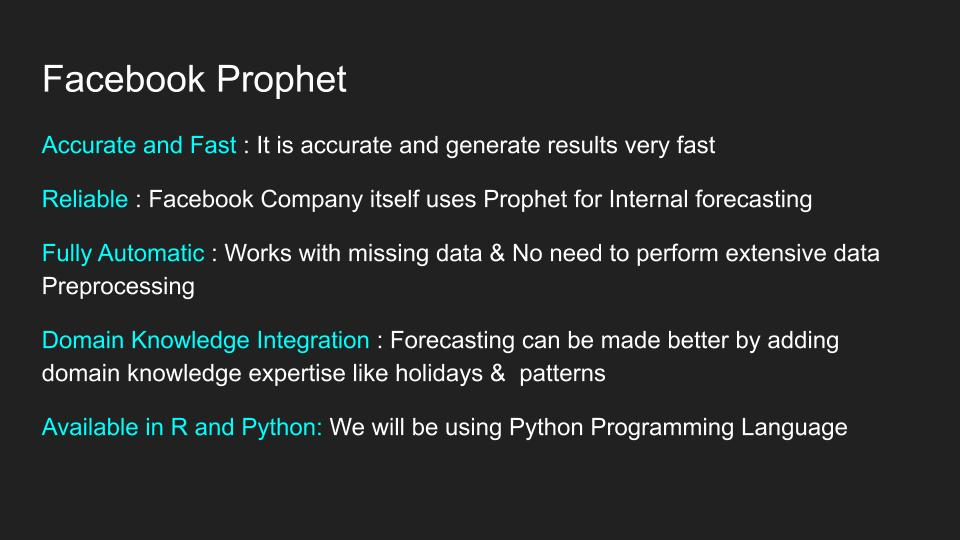

## Data Preperation

In [48]:
columns = ['Date', 'Close']
n_df = pd.DataFrame(df, columns = columns)
n_df.head()

,Date,Close
0,20-08-2004,2.697639
1,23-08-2004,2.724787
2,24-08-2004,2.611960
3,25-08-2004,2.640104
4,26-08-2004,2.687676


In [49]:
pro_df = n_df.rename(columns = {'Date': 'ds', 'Close': 'y'})
pro_df.head()

,ds,y
0,20-08-2004,2.697639
1,23-08-2004,2.724787
2,24-08-2004,2.611960
3,25-08-2004,2.640104
4,26-08-2004,2.687676


## Creating Facebook Prophet Model

In [50]:
model = Prophet()
model.fit(pro_df)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmplzjt8u6j/wa6efiti.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmplzjt8u6j/mjrk9mxb.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=10961', 'data', 'file=/tmp/tmplzjt8u6j/wa6efiti.json', 'init=/tmp/tmplzjt8u6j/mjrk9mxb.json', 'output', 'file=/tmp/tmplzjt8u6j/prophet_model3zd0v8mp/prophet_model-20230112034640.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
03:46:40 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
03:46:41 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [51]:
future = model.make_future_dataframe(periods=30)
forecast = model.predict(future)
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2004-01-09,2.562731,-6.524301,16.973596,2.562731,2.562731,2.299263,2.299263,2.299263,-0.238307,-0.238307,-0.238307,2.537570,2.537570,2.537570,0.0,0.0,0.0,4.861994
1,2004-01-10,2.571009,-6.154866,17.000639,2.571009,2.571009,3.184459,3.184459,3.184459,0.652466,0.652466,0.652466,2.531993,2.531993,2.531993,0.0,0.0,0.0,5.755468
2,2004-01-11,2.579287,-6.940120,16.193598,2.579287,2.579287,2.125915,2.125915,2.125915,-0.378386,-0.378386,-0.378386,2.504301,2.504301,2.504301,0.0,0.0,0.0,4.705202
3,2004-01-12,2.587566,-5.993310,17.183716,2.587566,2.587566,2.532535,2.532535,2.532535,0.075729,0.075729,0.075729,2.456806,2.456806,2.456806,0.0,0.0,0.0,5.120101
4,2004-02-09,2.819353,-6.032518,15.715840,2.819353,2.819353,2.107937,2.107937,2.107937,0.075729,0.075729,0.075729,2.032208,2.032208,2.032208,0.0,0.0,0.0,4.927290


##Forecasting

In [52]:
px.line(forecast, x='ds', y='yhat')

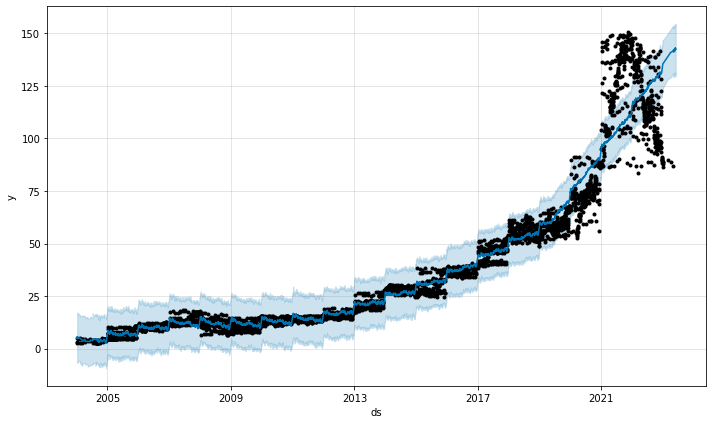

In [53]:
figure = model.plot(forecast, xlabel='ds', ylabel='y')

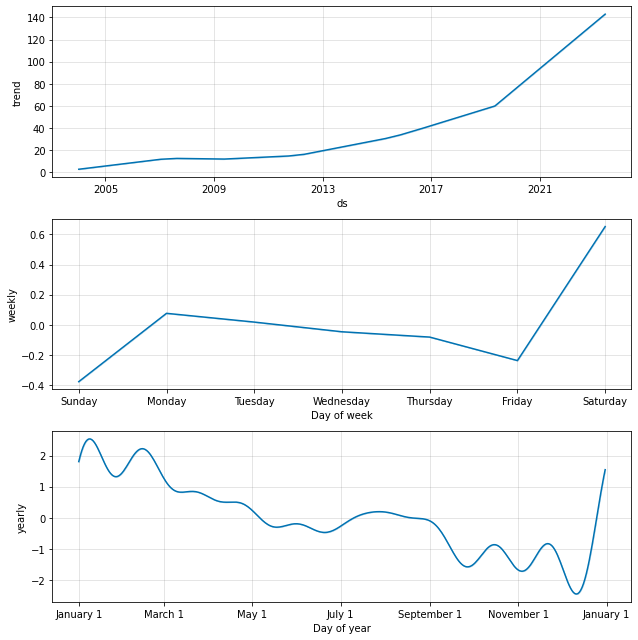

In [54]:
figure2 = model.plot_components(forecast)

##Downloading the Forecast data

In [55]:
from google.colab import files
forecast.to_csv("GOOG-Forecast.csv")
files.download("GOOG-Forecast.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [56]:
pred_df = pd.read_csv("GOOG-Forecast-1.csv")
pred_df.head()

,Date,Close,yhat
0,02/01/2020,68.368500,76.140981
1,03/01/2020,68.032997,75.290808
2,06/01/2020,69.710503,75.898578
3,07/01/2020,69.667000,75.967026
4,08/01/2020,70.216003,76.041824


In [57]:
px.line(pred_df, x='Date', y='yhat')

In [58]:
px.area(pred_df, x='Date', y='Close')

In [ ]:
# plt.area()
%matplotlib inline
%matplotlib notebook
plt.xlabel('Days')
plt.ylabel('Price')
plt.plot(pred_df['Close'], label ='Close')
plt.plot(pred_df['yhat'], label ='Predicted')
plt.legend()
plt.show()